In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('2-foodhub_order_New.csv')

In [3]:
#display the last 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24


In [4]:
#display the last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31.0,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31.0,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31.0,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23.0,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28.0,24


In [5]:
#check the shape of the dataset
df.shape

(1898, 9)

In [6]:
#check the datatypes of each feature
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time    float64
delivery_time             object
dtype: object

In [7]:
#check the statistical summary
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time
count,1.898000e+03,1898.000000,1898.000000,1896.000000
mean,1.477496e+06,171168.478398,80.722007,27.371835
std,5.480497e+02,113698.139743,2798.141333,4.634211
min,1.476547e+06,1311.000000,0.000000,20.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000
50%,1.477496e+06,128600.000000,14.160000,27.000000
75%,1.477970e+06,270525.000000,22.310000,31.000000
max,1.478444e+06,405334.000000,121920.000000,35.000000


In [8]:
#check for null values 
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             3
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    2
delivery_time            0
dtype: int64

In [9]:
#check for duplicate values
df.duplicated().sum()

0

In [10]:
#check the anomalies or wrong entries.
#inspect umique values
print(df['restaurant_name'].unique())
print(df['cuisine_type'].unique())
print(df['day_of_the_week'].unique())

['Hangawi' 'Blue Ribbon Sushi Izakaya' 'Cafe Habana'
 'Blue Ribbon Fried Chicken' 'Dirty Bird to Go' 'Tamarind TriBeCa'
 'The Meatball Shop' 'Barbounia' 'Anjappar Chettinad' 'Bukhara Grill'
 'Big Wong Restaurant \x8c_¤¾Ñ¼' 'Empanada Mama (closed)' 'Pylos'
 "Lucky's Famous Burgers" 'Shake Shack' 'Sushi of Gari' 'RedFarm Hudson'
 'Blue Ribbon Sushi' 'Five Guys Burgers and Fries' 'Tortaria'
 'Cafe Mogador' 'Otto Enoteca Pizzeria' 'Vezzo Thin Crust Pizza'
 'Sushi of Gari 46' 'The Kati Roll Company' 'Klong' '5 Napkin Burger'
 'TAO' 'Parm' 'Sushi Samba' 'Haru Gramercy Park'
 'Chipotle Mexican Grill $1.99 Delivery' 'RedFarm Broadway' 'Cafeteria'
 'DuMont Burger' "Sarabeth's East" 'Hill Country Fried Chicken' 'Bistango'
 "Jack's Wife Freda" "Mamoun's Falafel" 'Prosperity Dumpling'
 'Blue Ribbon Sushi Bar & Grill' 'Westville Hudson' 'Blue Ribbon Brooklyn'
 'Nobu Next Door' 'Osteria Morini' 'Haandi' 'Benihana' 'Han Dynasty'
 'Chote Nawab' 'Mission Cantina' "Xi'an Famous Foods" 'Rubirosa'
 "Joe's

In [11]:
#check the outliers and their authenticity


###1.ORDER ANALYSIS

In [12]:
# Calculate the total number of orders
total_orders = df.shape[0]
print("Total number of orders:", total_orders)

Total number of orders: 1898


In [13]:
#Calculate the average cost of an order
average_cost = df['cost_of_the_order'].mean()
print("Average cost of an order:", average_cost)

Average cost of an order: 80.72200737618546


In [14]:
unique_customers = df['customer_id'].nunique()
print("Number of unique customers:", unique_customers)

Number of unique customers: 1200


In [15]:
#Group by restaurant_name and count the number of orders for each restaurant
restaurant_order_counts = df['restaurant_name'].value_counts()

# Get the restaurant with the highest number of orders
restaurant_with_most_orders = restaurant_order_counts.idxmax()
highest_orders_count = restaurant_order_counts.max()

print("Restaurant with the highest number of orders:", restaurant_with_most_orders)
print("Number of orders:", highest_orders_count)

Restaurant with the highest number of orders: Shake Shack
Number of orders: 219


###2.CUSTOMER BEHAVIOUR

In [16]:
# Calculate the average rating given by customers
#average_rating = df['rating'].mean()

#print("Average rating given by customers:", average_rating)

In [17]:
# Convert 'day_of_the_week' to categorical if needed
df['day_of_the_week'] = pd.Categorical(df['day_of_the_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

# Calculate average rating for weekdays
weekday_ratings = df[df['day_of_the_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['rating'].mean()

# Calculate average rating for weekends
weekend_ratings = df[df['day_of_the_week'].isin(['Saturday', 'Sunday'])]['rating'].mean()

print("Average rating on weekdays:", weekday_ratings)
print("Average rating on weekends:", weekend_ratings)

Average rating on weekdays: nan
Average rating on weekends: nan


In [18]:
#which cuisine type is ordered the most
popular_cuisine = df['cuisine_type'].value_counts().idxmax()
print("Cuisine type ordered the most:",popular_cuisine)

Cuisine type ordered the most: American


C:\bhupen\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


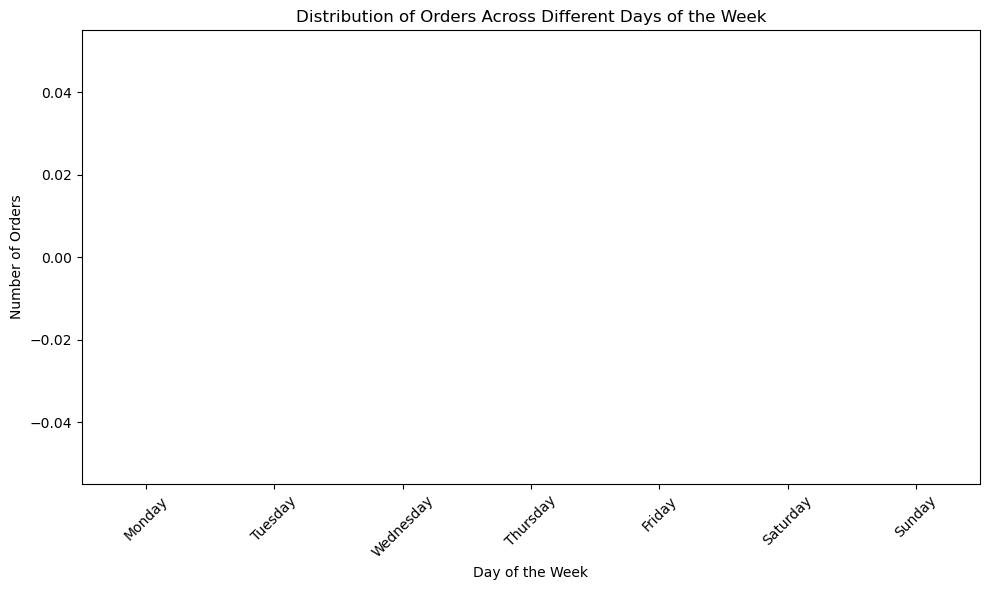

In [19]:
# Count the number of orders for each day of the week
order_counts = df['day_of_the_week'].value_counts().sort_index()

# Plotting the distribution of orders across different days of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=order_counts.index, y=order_counts.values, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders Across Different Days of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###RESTAURANT PERFORMANCE 

In [20]:
#What is the average food preparation time for each restaurant?
avg_prep_time_per_restaurant = df.groupby('restaurant_name')['food_preparation_time'].mean()

print("Average food preparation time for each restaurant:")
print(avg_prep_time_per_restaurant)

Average food preparation time for each restaurant:
restaurant_name
'wichcraft          28.000000
12 Chairs           27.000000
5 Napkin Burger     30.200000
67 Burger           20.000000
Alidoro             34.000000
                      ...    
Zero Otto Nove      30.000000
brgr                25.000000
da Umberto          24.333333
ilili Restaurant    26.388889
indikitch           30.750000
Name: food_preparation_time, Length: 178, dtype: float64


In [21]:
#Which restaurant has the shortest average food preparation time?
restaurant_shortest_prep_time = avg_prep_time_per_restaurant.idxmin()
shortest_prep_time = avg_prep_time_per_restaurant.min()

print("Restaurant with the shortest average food preparation time:", restaurant_shortest_prep_time)
print("Shortest average food preparation time:", shortest_prep_time, "minutes")

Restaurant with the shortest average food preparation time: 67 Burger
Shortest average food preparation time: 20.0 minutes


In [22]:
#How does the average delivery time compare across different restaurants?
#avg_delivery_time_per_restaurant = df.groupby('restaurant_name')['delivery_time'].mean()

#print("Average delivery time for each restaurant:")
#print(avg_delivery_time_per_restaurant)

In [23]:
#Is there a correlation between the cost of the order and the rating given?
#correlation = df['cost_of_the_order'].corr(df['rating'])

#print("Correlation between cost of order and rating given:", correlation)

###DEMAND PATTERNS

C:\Users\BHUPENDRA SAINI\AppData\Local\Temp\ipykernel_18688\953771539.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_count = orders.groupby(['cuisine_type', 'day_of_the_week']).size().reset_index(name='order_count')


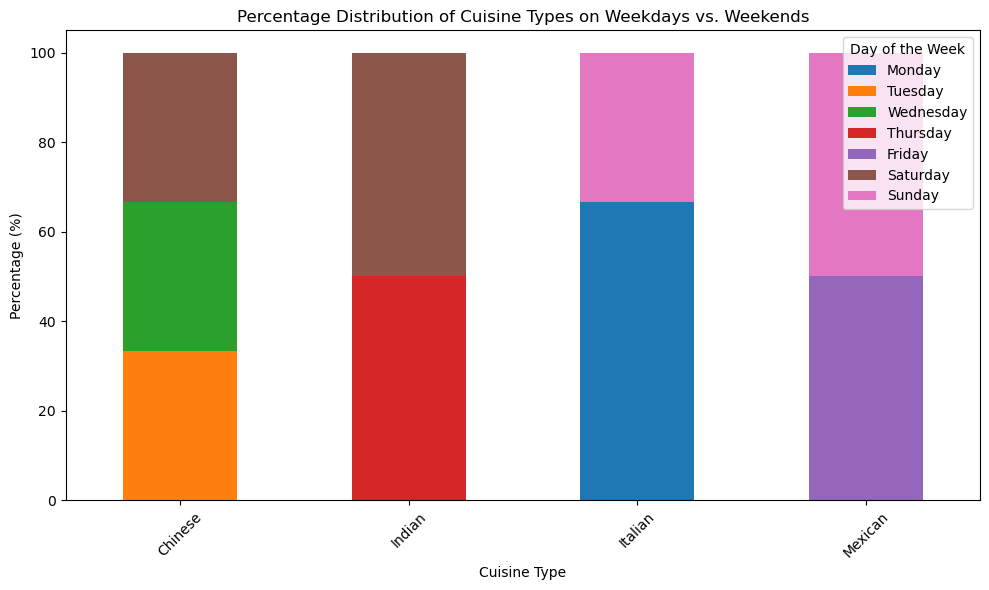

In [24]:
# Example data (replace with your actual data loading)
data = {
    'order_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'customer_id': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'restaurant_name': ['Restaurant A', 'Restaurant B', 'Restaurant A', 'Restaurant C', 'Restaurant B',
                        'Restaurant A', 'Restaurant B', 'Restaurant C', 'Restaurant A', 'Restaurant B'],
    'cuisine_type': ['Italian', 'Chinese', 'Indian', 'Mexican', 'Italian',
                     'Chinese', 'Indian', 'Mexican', 'Italian', 'Chinese'],
    'cost': [30, 25, 40, 35, 20, 45, 28, 38, 32, 22],
    'day_of_the_week': ['Monday', 'Wednesday', 'Saturday', 'Friday', 'Sunday',
                        'Tuesday', 'Thursday', 'Sunday', 'Monday', 'Saturday'],
    'rating': [4, 3, 5, 4, 2, 3, 4, 5, 3, 4],
    'food_preparation_time': [20, 15, 25, 30, 18, 22, 17, 28, 26, 20],
    'delivery_time': [10, 12, 15, 20, 8, 11, 14, 18, 16, 10]
}

orders = pd.DataFrame(data)

# Convert 'day_of_the_week' to categorical for proper sorting
orders['day_of_the_week'] = pd.Categorical(orders['day_of_the_week'],
                                           categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                           ordered=True)

# Group by cuisine_type and day_of_the_week, count orders
orders_count = orders.groupby(['cuisine_type', 'day_of_the_week']).size().reset_index(name='order_count')

# Calculate total orders per cuisine_type
total_orders_per_cuisine = orders_count.groupby('cuisine_type')['order_count'].sum()

# Calculate percentage of orders for each cuisine_type on weekdays and weekends
orders_count['total_orders_cuisine'] = orders_count['cuisine_type'].map(total_orders_per_cuisine)
orders_count['percentage'] = (orders_count['order_count'] / orders_count['total_orders_cuisine']) * 100

# Pivot the data to have cuisine_type as columns for better visualization
pivot_data = orders_count.pivot(index='cuisine_type', columns='day_of_the_week', values='percentage')

# Plotting
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage Distribution of Cuisine Types on Weekdays vs. Weekends')
plt.xlabel('Cuisine Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week')
plt.tight_layout()
plt.show()

In [25]:
#Demand for different cuisine types on weekdays vs. weekends
demand_by_cuisine = orders.groupby(['cuisine_type', 'day_of_the_week']).size().reset_index(name='count')
total_orders = demand_by_cuisine.groupby('cuisine_type')['count'].sum()
demand_by_cuisine['percentage'] = demand_by_cuisine.apply(lambda row: (row['count'] / total_orders[row['cuisine_type']]) * 100, axis=1)
print("Demand for different cuisine types on weekdays vs. weekends:")
print(demand_by_cuisine)

Demand for different cuisine types on weekdays vs. weekends:
   cuisine_type day_of_the_week  count  percentage
0       Chinese          Monday      0    0.000000
1       Chinese         Tuesday      1   33.333333
2       Chinese       Wednesday      1   33.333333
3       Chinese        Thursday      0    0.000000
4       Chinese          Friday      0    0.000000
5       Chinese        Saturday      1   33.333333
6       Chinese          Sunday      0    0.000000
7        Indian          Monday      0    0.000000
8        Indian         Tuesday      0    0.000000
9        Indian       Wednesday      0    0.000000
10       Indian        Thursday      1   50.000000
11       Indian          Friday      0    0.000000
12       Indian        Saturday      1   50.000000
13       Indian          Sunday      0    0.000000
14      Italian          Monday      2   66.666667
15      Italian         Tuesday      0    0.000000
16      Italian       Wednesday      0    0.000000
17      Italian      

C:\Users\BHUPENDRA SAINI\AppData\Local\Temp\ipykernel_18688\3023552272.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demand_by_cuisine = orders.groupby(['cuisine_type', 'day_of_the_week']).size().reset_index(name='count')


In [26]:
# Day of the week with highest average order cost
average_cost_by_day = orders.groupby('day_of_the_week')['cost'].mean()
highest_cost_day = average_cost_by_day.idxmax()
print("\nDay of the week with highest average order cost:", highest_cost_day)


Day of the week with highest average order cost: Tuesday


C:\Users\BHUPENDRA SAINI\AppData\Local\Temp\ipykernel_18688\2028201023.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_cost_by_day = orders.groupby('day_of_the_week')['cost'].mean()


In [27]:
#Most common day for orders to be placed
most_common_day = orders['day_of_the_week'].mode()[0]
print("\nMost common day for orders to be placed:", most_common_day)


Most common day for orders to be placed: Monday


In [28]:
#Average rating by cuisine type
average_rating_by_cuisine = orders.groupby('cuisine_type')['rating'].mean()
print("\nAverage rating by cuisine type:")
print(average_rating_by_cuisine)


Average rating by cuisine type:
cuisine_type
Chinese    3.333333
Indian     4.500000
Italian    3.000000
Mexican    4.500000
Name: rating, dtype: float64


###OPERATIONAL EFFICIENCY 

In [29]:
#What is the average delivery time for all orders?
data = {
    'order_id': [1, 2, 3, 4, 5],
    'restaurant_name': ['Restaurant A', 'Restaurant B', 'Restaurant A', 'Restaurant C', 'Restaurant B'],
    'food_preparation_time': [20, 15, 25, 30, 18],
    'delivery_time': [10, 12, 15, 20, 8]
}

orders = pd.DataFrame(data)

# Calculate average delivery time
average_delivery_time = orders['delivery_time'].mean()

print(f"The average delivery time for all orders is: {average_delivery_time:.2f} minutes")

The average delivery time for all orders is: 13.00 minutes


In [30]:
#Which restaurant has the longest average delivery time?
# Group by restaurant and calculate average delivery time
average_delivery_time_restaurant = orders.groupby('restaurant_name')['delivery_time'].mean()

# Find the restaurant with the longest average delivery time
restaurant_longest_delivery_time = average_delivery_time_restaurant.idxmax()
longest_delivery_time = average_delivery_time_restaurant.max()

print(f"The restaurant with the longest average delivery time is '{restaurant_longest_delivery_time}' with {longest_delivery_time:.2f} minutes")

The restaurant with the longest average delivery time is 'Restaurant C' with 20.00 minutes


In [31]:
#Is there a relationship between food preparation time and delivery time?
correlation = orders['food_preparation_time'].corr(orders['delivery_time'])

print(f"The correlation coefficient between food preparation time and delivery time is: {correlation:.2f}")

The correlation coefficient between food preparation time and delivery time is: 0.85


In [34]:
#How does the delivery time impact customer ratings?


###CUSTOMER INSIGHTS

In [35]:
#What is the repeat order rate (number of customers who have placed more than one order)?
# Example data (replace with your actual data loading)
data = {
    'order_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'customer_id': [101, 102, 103, 101, 104, 105, 103, 106, 107, 102],
    'restaurant_name': ['Restaurant A', 'Restaurant B', 'Restaurant A', 'Restaurant C', 'Restaurant B',
                        'Restaurant A', 'Restaurant B', 'Restaurant C', 'Restaurant A', 'Restaurant B'],
    'cuisine_type': ['Italian', 'Chinese', 'Indian', 'Mexican', 'Italian',
                     'Chinese', 'Indian', 'Mexican', 'Italian', 'Chinese'],
    'cost': [30, 25, 40, 35, 20, 45, 28, 38, 32, 22],
    'day_of_the_week': ['Monday', 'Wednesday', 'Saturday', 'Friday', 'Sunday',
                        'Tuesday', 'Thursday', 'Sunday', 'Monday', 'Saturday'],
    'rating': [4, 3, 5, 4, 2, 3, 4, 5, 3, 4],
    'food_preparation_time': [20, 15, 25, 30, 18, 22, 17, 28, 26, 20],
    'delivery_time': [10, 12, 15, 20, 8, 11, 14, 18, 16, 10]
}

orders = pd.DataFrame(data)

# 1. Repeat order rate (number of customers who have placed more than one order)
repeat_customers = orders.groupby('customer_id').size()
repeat_order_rate = (repeat_customers > 1).sum() / repeat_customers.count()
print(f"The repeat order rate is: {repeat_order_rate:.2%}")


The repeat order rate is: 42.86%


In [36]:
#What percentage of orders receive a rating of 4 or higher?
high_rating_orders = orders[orders['rating'] >= 4]
percentage_high_rating = (len(high_rating_orders) / len(orders)) * 100

print(f"The percentage of orders with a rating of 4 or higher is: {percentage_high_rating:.2f}%")

The percentage of orders with a rating of 4 or higher is: 60.00%
